+ k-인접이웃(K-nearest neighbor, KNN) : 새로운 데이터에 대해 이와 가장 거리가 가까운 k-개의 과거자료의 결과(집단)를 이용하여 다수결로 분류
  + 과거 데이터는 저장만 해두고 필요시 비교 수행하는 방식
  + 반응변수가 범주형 $\rightarrow$ 분류 목적, 연속형 $\rightarrow$ 회귀 목적
  + 주변 값들의 기여도에 가중 부여 가능(거리에 반비례 / 가까우면 큰 가중)
  + 특징
    + k값의 선택에 따라 새로운 데이터에 대한 분류결과가 달라짐
    + 사례 기반학습 : 지역 정보만으로 근사 + 모든 계산 후 분류 수행
    + 단점 : 데이터의 지역 구조에 민감함

### 예제 1. knn(){class}

In [1]:
install.packages("class")
library(class)
data(iris3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
train = rbind(iris3[1:25,,1], iris3[1:25,,2], iris3[1:25,,3])  # 행렬객체
test = rbind(iris3[26:50,,1], iris3[26:50,,2], iris3[26:50,,3])
c1 = factor(c(rep("s", 25), rep("c", 25), rep("v", 25)))
knn(train, test, c1, k = 3, prob = TRUE)  # prob = TRUE : 확률이 큰 쪽으로 분류

[1] s s s s s s s s s s s s s s s s s s s s s s s s s c c v c c c c c v c c c c
[39] c c c c c c c c c c c c v c c v v v v v v v v v v c v v v v v v v v v v v
attr(,"prob")
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667
[29] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[50] 1.0000000 1.0000000 0.6666667 0.7500000 1.0000000 1.0000000 1.0000000
[57] 1.0000000 1.0000000 0.5000000 1.0000000 1.0000000 1.0000000 1.0000000
[64] 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[71] 1.0000000 0.6666667 1.0000000 1.0000000 0.6666667
Levels: c s v

+ y 범주형 / trian(앞 25개) + test(뒤 25개)
+ knn 해석
  + [1] : 실제로 3개 다 S
  + [75] : 실제로 2개는 v, 1개는 v가 아닌 것

### 예제 2. kNN(){DMwR}

+ Colab에서 DMwR 패키지의 지난 버전 설치를 진행하지 못하여 코드만 첨부

In [3]:
# library(DMwR)
# data(iris)
# idxs = sample(1 : nrow(iris), as.integer(0.7 * nrow(iris)))  # train 70%
# trainIris = iris[idxs,]
# testIris = iris[-idxs,]
# # trainIris 자료에서 Species를 y로 하고 나머지 변수를 전부 예측변수로 하는 knn분류 알고리즘을 수행하여라
# # k값의 설정은 분석자가 주관적으로 설정해야하는 사안
# nn3 = kNN(Species ~ ., trainIris, testIris, norm = FALSE, k = 3)
# table(testIris[,'Species'], nn3)
# nn5 = kNN(Species ~ ., trainIris, testIris, norm = TRUE, k = 5)
# table(testIris[,'Species'], nn5)

+ knn(){DMwR} vs knn(){class}
  + 모형식 기반으로 수행, 정규화 옵션 제공
+ 정규화 수행 : 통상적으로 이질적인 자료에 대해서는 정규화를 시키는 것이 바람직함
  + 이 자료에서는 단위가 다른 변수가 아니기에 정규화의 효과가 크지 않아 결과에 영향을 미치지 않으므로 정규화 수행 x

### 예제 3. kknn(){kknn}

In [4]:
install.packages("kknn")
library(kknn)
data(iris)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [5]:
m = dim(iris)[1]
val = sample(1:m, size = round(m/3), replace = FALSE, prob = rep(1/m, m))
iris.learn = iris[-val,]
iris.valid = iris[val,]
iris.kknn = kknn(Species ~ ., iris.learn, iris.valid, distance = 1, kernel = "triangular")  # 맨하튼 거리
summary(iris.kknn)


Call:
kknn(formula = Species ~ ., train = iris.learn, test = iris.valid,     distance = 1, kernel = "triangular")

Response: "nominal"
          fit prob.setosa prob.versicolor prob.virginica
1  versicolor           0      0.96280416     0.03719584
2  versicolor           0      0.85431665     0.14568335
3      setosa           1      0.00000000     0.00000000
4  versicolor           0      1.00000000     0.00000000
5   virginica           0      0.00000000     1.00000000
6      setosa           1      0.00000000     0.00000000
7      setosa           1      0.00000000     0.00000000
8      setosa           1      0.00000000     0.00000000
9   virginica           0      0.49164279     0.50835721
10 versicolor           0      1.00000000     0.00000000
11     setosa           1      0.00000000     0.00000000
12 versicolor           0      1.00000000     0.00000000
13 versicolor           0      1.00000000     0.00000000
14  virginica           0      0.02613246     0.97386754
15     se

In [6]:
fit = fitted(iris.kknn)
table(iris.valid$Species, fit)
# s=1, v=2, c=3으로 변환하여 이 1, 2, 3을 문자로 인식

            fit
             setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         17         2
  virginica       0          3        11

In [7]:
pcol = as.character(as.numeric(iris.valid$Species))
# 정분류일 경우 - false(0) - +1 수행 - 1 - green3
# 오분류일 경우 - true(1) - +1 수행 - 2 - red

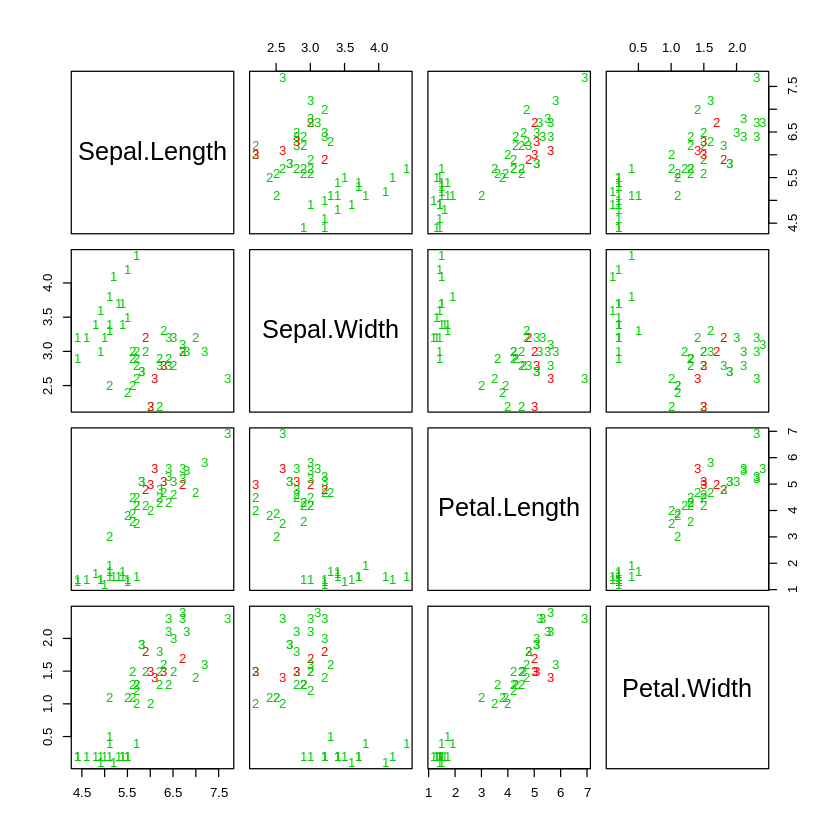

In [8]:
pairs(iris.valid[1:4], pch = pcol,
      col = c("green3", "red")[(iris.valid$Species != fit) + 1])

+ 가중 knn 분류를 제공 $\rightarrow$ 커널밀도함수의 합이 최대인 군집으로 분류를 수행
  + kernel : rectangular, triangular, epanechnikov, biweight, triweight, cos, inv, gaussian, rank, optimal
+ distance = 1 $\rightarrow$ 맨하튼 거리, distance = 2 $\rightarrow$ 유클리드 거리

### 예제 4. {FNN}, k-NN 회귀

In [9]:
full = data.frame(name = c("McGwire, Mark", "Bonds, Barry", "Helton, Todd",
                           "Walker, Larry", "ujols, Albert", "Pedroia, Dustin"),
                  lag1 = c(100, 90, 75, 89, 95, 70),
                  lag2 = c(120, 80, 95, 79, 92, 90),
                  Runs = c(65, 120, 105, 99, 65, 100))
library(kknn)
train = full[full$name != "Bonds, Barry",]
test = full[full$name == "Bonds, Barry",]
# testdata(Bonds, Barry 선수)와 가까운 선수 2명만 선택하여 시가거리에 기반하여 평균을 내어 y를 예측하여라
k = kknn(Runs ~ lag1 + lag2, train = train, test = test, k = 2, distance = 1)
fit = fitted(k)
fit

[1] 90.5

In [10]:
names(k)

[1] "fitted.values" "CL"            "W"             "D"            
 [5] "C"             "prob"          "response"      "distance"     
 [9] "call"          "terms"

In [11]:
k$fitted.values

[1] 90.5

In [12]:
k$CL  # class의 행렬

99,65


In [13]:
k$W  # 가중치의 행렬

0.75,0.25


In [14]:
k$C  # 인접이웃 위치

[1] 3 4

In [15]:
train[c(k$C),]

,name,lag1,lag2,Runs
,<chr>,<dbl>,<dbl>,<dbl>
4,"Walker, Larry",89,79,99
5,"ujols, Albert",95,92,65


In [16]:
install.packages("FNN")
library(FNN)
# test자료의 lag1, lag2를 이용해 가까운 2개 인접이웃을 train에 대해 찾아라
get.knnx(data = train[, c("lag1", "lag2")], query = test[,c("lag1", "lag2")], k = 2)
train[c(3, 4), "name"]  # 훈련용 자료에서 3, 4번의 name

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘FNN’


The following objects are masked from ‘package:class’:

    knn, knn.cv




3,4
1.414214,13


[1] "Walker, Larry" "ujols, Albert"

+ {FNN} : 훈련용 자료에 대해 원하는 질의를 통해 필요한 결과를 얻게 해 줌
+ $nn.dist : 디폴트로 유클리드거리 제공

## 7.3절 {caret}을 이용한 k-NN 분석
### (a) 표본추출

In [17]:
install.packages("ISLR")
install.packages("caret")
library(ISLR)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:kknn’:

    contr.dummy




In [18]:
set.seed(100)
# y 정보를 이용해 층화추출 -> y 정보를 줌으로써 0, 1이 골고루 뽑히게 함
indxTrain = createDataPartition(y = Smarket$Direction, p = 0.75, list = FALSE)  # 훈련용 / 검증용 자료 나눔
training = Smarket[indxTrain,]
testing = Smarket[-indxTrain,]
prop.table(table(training$Direction)) * 100
prop.table(table(testing$Direction)) * 100
prop.table(table(Smarket$Direction)) * 100


    Down       Up 
48.18763 51.81237 


    Down       Up 
48.07692 51.92308 


 Down    Up 
48.16 51.84 

### (b) 전처리

In [19]:
trainX = training[, names(training) != "Direction"]  # 전처리 시 불편함을 줄이기 위해 반응변수를 제외
preProcValues = preProcess(x = trainX, method = c("center", "scale"))  # 중심화, 척도화 -> 표준화
preProcValues

Created from 938 samples and 8 variables

Pre-processing:
  - centered (8)
  - ignored (0)
  - scaled (8)


### (c) 훈련과 훈련조율

In [20]:
set.seed(200)
# 모형평가 시 repeatedcv 방법을 3회 반복하겠다.
ctrl = trainControl(method = "repeatedcv", repeats = 3)
knnFit = train(Direction ~ ., data = training, method = "knn", trControl = ctrl,
               preProcess = c("center", "scale"), tuneLength = 20)
knnFit  # k-NN 적합 결과

k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 843, 844, 845, 845, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8837625  0.7668667
   7  0.8823439  0.7641736
   9  0.8798806  0.7591151
  11  0.8930660  0.7855027
  13  0.8923603  0.7840046
  15  0.8983926  0.7959911
  17  0.9008712  0.8008697
  19  0.8998034  0.7987302
  21  0.9015651  0.8021944
  23  0.9015574  0.8021663
  25  0.9072465  0.8135966
  27  0.9072542  0.8135649
  29  0.9111626  0.8214699
  31  0.9090274  0.8171458
  33  0.9058319  0.8107612
  35  0.9097479  0.8186335
  37  0.9076353  0.8143704
  39  0.9065752  0.8122363
  41  0.9080164  0.8150995
  43  0.9090842  0.8172527

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 29.

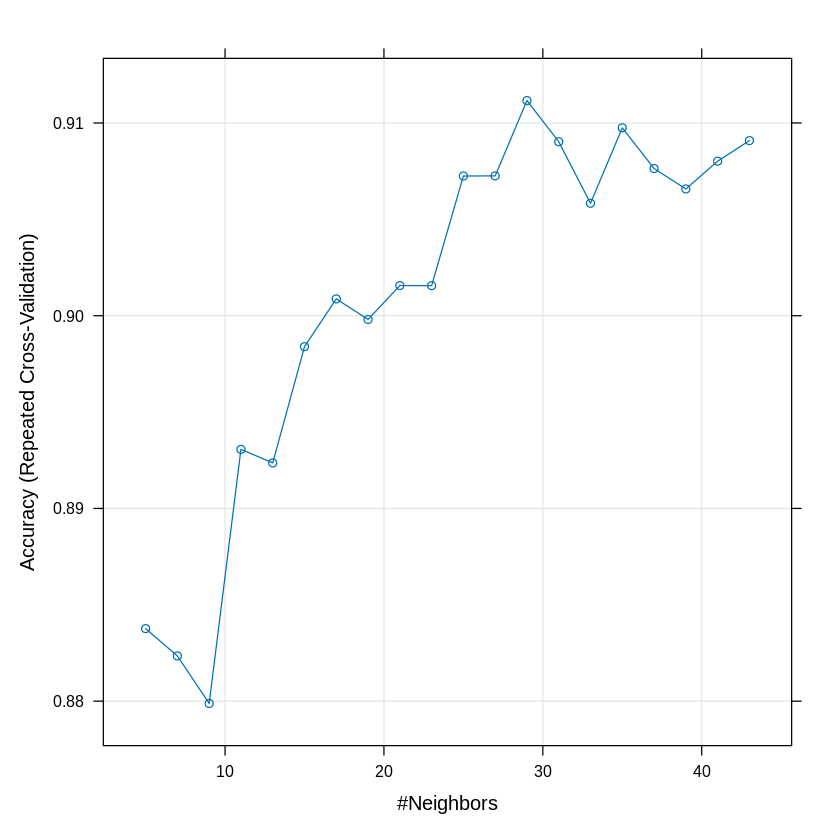

In [21]:
plot(knnFit)

+ 인접이웃의 크기(k)가 29일 때 정확도가 제일 높다.

In [22]:
knnPredict = predict(knnFit, newdata = testing)
confusionMatrix(knnPredict, testing$Direction)  # 정오분류표

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  124   8
      Up     26 154
                                          
               Accuracy : 0.891           
                 95% CI : (0.8511, 0.9233)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7808          
                                          
 Mcnemar's Test P-Value : 0.003551        
                                          
            Sensitivity : 0.8267          
            Specificity : 0.9506          
         Pos Pred Value : 0.9394          
         Neg Pred Value : 0.8556          
             Prevalence : 0.4808          
         Detection Rate : 0.3974          
   Detection Prevalence : 0.4231          
      Balanced Accuracy : 0.8886          
                                          
       'Positive' Class : Down            
                           

In [23]:
mean(knnPredict == testing$Direction)

[1] 0.8910256

+ 정확도 : 89.1%

In [24]:
set.seed(300)
ctrl = trainControl(method = "repeatedcv", repeats = 3,
                    classProbs = TRUE, summaryFunction = twoClassSummary)
knnFit = train(Direction ~ ., data = training, method = "knn", trControl = ctrl,
               preProcess = c("center", "scale"), tuneLength = 20)
knnFit

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 844, 845, 844, 845, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9490633  0.8525443  0.9086310
   7  0.9569101  0.8628663  0.8943452
   9  0.9631884  0.8569887  0.9080641
  11  0.9679797  0.8717874  0.9224773
  13  0.9692392  0.8636393  0.9279478
  15  0.9694958  0.8554911  0.9334325
  17  0.9718937  0.8539291  0.9361678
  19  0.9744087  0.8510467  0.9389031
  21  0.9745304  0.8511433  0.9403628
  23  0.9760532  0.8577456  0.9424178
  25  0.9783209  0.8607085  0.9458475
  27  0.9779612  0.8629147  0.9547619
  29  0.9769421  0.8533494  0.9485544
  31  0.9768530  0.8599678  0.9465278
  33  0.9769135  0.8628824  0.9561083
  35  0.9771471  0.8584541  0.9526927
  37  0.9769091  0.8643800  0.9561224
  39  0.9770477  0.8606763  0.95340

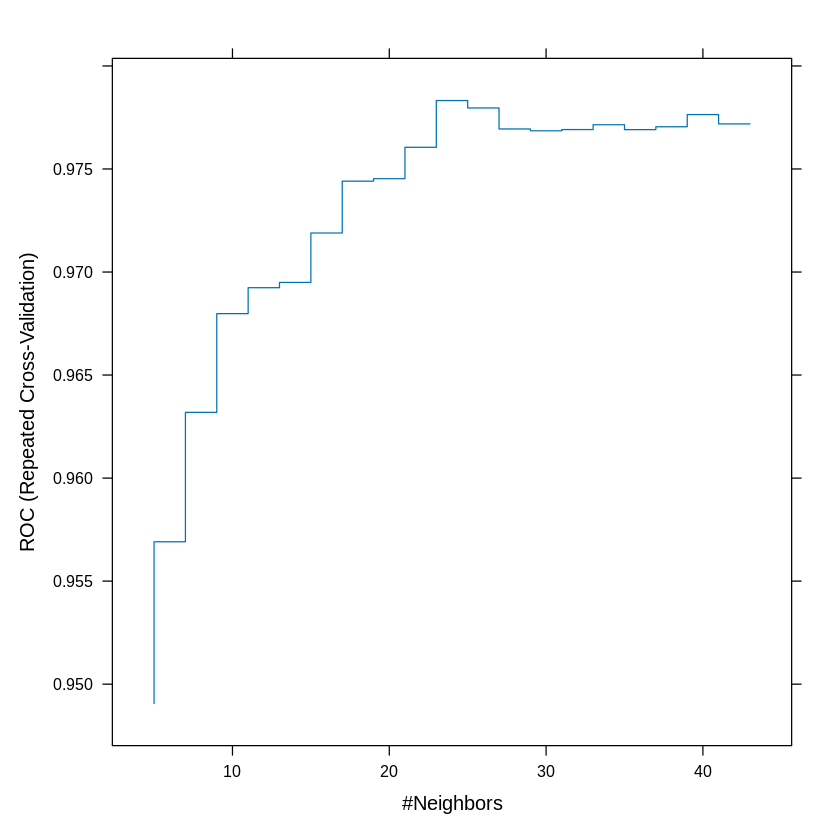

In [25]:
# knnFit에 대해 0.5 기준을 사용했을 때 민감도, 특이도 값을 그림에 계단형태로 제시하여라
plot(knnFit, print.thres = 0.5, type = "S")

+ summary=twoClassSummary : AUC, 민감도, 특이도 등 성능측도 제공
  + classProbs = TRUE : 출력된 확률값에 기반하여 계산이 가능하게 하는 옵션으로 위의 측도 계산에 필요
+ tuneLength = 20 : 조율모수의 격자 조절
+ 적합모형은 인접이웃으로 k=25를 선택하였다(AUC 기준 사용)

In [26]:
knnPredict = predict(knnFit, newdata = testing)
confusionMatrix(knnPredict, testing$Direction)  # 정오분류표

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  122   8
      Up     28 154
                                          
               Accuracy : 0.8846          
                 95% CI : (0.8439, 0.9179)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7677          
                                          
 Mcnemar's Test P-Value : 0.001542        
                                          
            Sensitivity : 0.8133          
            Specificity : 0.9506          
         Pos Pred Value : 0.9385          
         Neg Pred Value : 0.8462          
             Prevalence : 0.4808          
         Detection Rate : 0.3910          
   Detection Prevalence : 0.4167          
      Balanced Accuracy : 0.8820          
                                          
       'Positive' Class : Down            
                           

In [27]:
mean(knnPredict == testing$Direction)

[1] 0.8846154

+ 정확도 : 88.8% (다소 감소)

In [28]:
# ROC 곡선 그리기
install.packages("pROC")
library(pROC)
knnPredict = predict(knnFit, newdata = testing, type = "prob")
knnROC = roc(testing$Direction, knnPredict[, "Down"], levels = levels(testing$Direction))
knnROC

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting direction: controls > cases




Call:
roc.default(response = testing$Direction, predictor = knnPredict[,     "Down"], levels = levels(testing$Direction))

Data: knnPredict[, "Down"] in 150 controls (testing$Direction Down) > 162 cases (testing$Direction Up).
Area under the curve: 0.9659

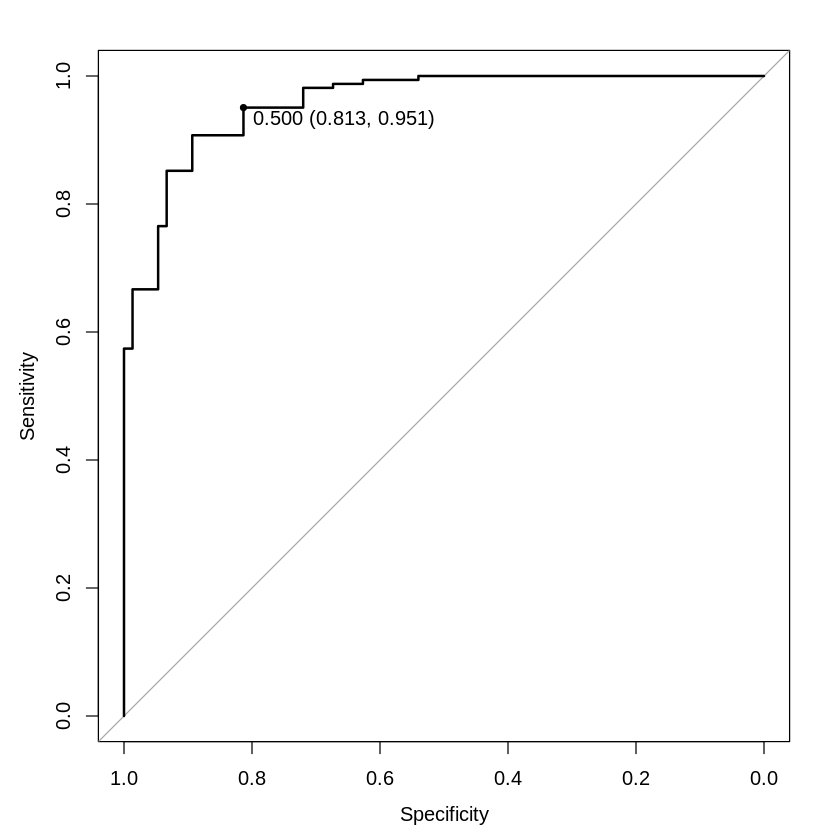

In [29]:
plot(knnROC, type = "S", print.thres = 0.5)  # 기준값 0.5일 때의 결과를 표시

+ AUC : 0.9698로 굉장히 뛰어난 성능

### (d) 랜덤포리스트(method = "rf")를 적용한 결과

In [30]:
set.seed(400)
install.packages("randomForest")
library(randomForest)
ctrl = trainControl(method = "repeatedcv", repeats = 3)
rfFit = train(Direction ~ ., data = training, method = "rf", trControl = ctrl,
              preProcess = c("center", "scale"), tuneLength = 20)  # rf : 랜덤포레스트
rfFit  # mtry는 임의로 선택된 예측변수의 수(조율모수)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




note: only 7 unique complexity parameters in default grid. Truncating the grid to 7 .



Random Forest 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 844, 844, 844, 844, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9989399  0.9978761
  3     0.9989399  0.9978761
  4     0.9989399  0.9978761
  5     0.9989399  0.9978761
  6     0.9989399  0.9978761
  7     0.9989399  0.9978761
  8     0.9989399  0.9978761

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

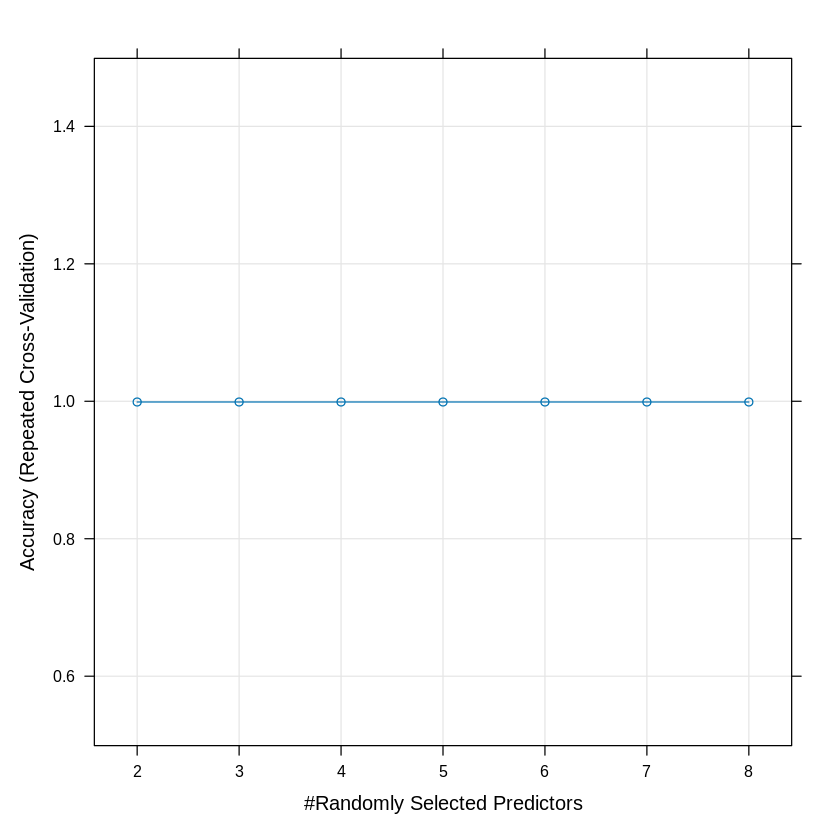

In [31]:
plot(rfFit)

In [32]:
rfPredict = predict(rfFit, newdata = testing)
confusionMatrix(rfPredict, testing$Direction)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  150   1
      Up      0 161
                                          
               Accuracy : 0.9968          
                 95% CI : (0.9823, 0.9999)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9936          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9938          
         Pos Pred Value : 0.9934          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4808          
         Detection Rate : 0.4808          
   Detection Prevalence : 0.4840          
      Balanced Accuracy : 0.9969          
                                          
       'Positive' Class : Down            
                           

In [33]:
mean(rfPredict == testing$Direction)

[1] 0.9967949

+ 랜덤포레스트 : 일종의 앙상블 모형으로 대체로 성능이 매우 뛰어난 방법으로 알려져 있다.
+ 조율모수로 2를 선택하는 것이 최적의 모형
+ 정분류율이 100%로 rf가 얼마나 좋은 모형인지를 보여줌

+ 클래스 요약함수 사용하여 AUC 기반 모형 구축

In [34]:
set.seed(500)
ctrl = trainControl(method = "repeatedcv", repeats = 3, classProbs = TRUE,
                    summaryFunction = twoClassSummary)
rfFit = train(Direction ~ ., data = training, method = "rf", trControl = ctrl,
              preProcess = c("center", "scale"), tuneLength = 20)
rfFit

note: only 7 unique complexity parameters in default grid. Truncating the grid to 7 .



Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


Random Forest 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 845, 844, 843, 844, 844, ... 
Resampling results across tuning parameters:

  mtry  ROC  Sens       Spec
  2     1    0.9977778  1   
  3     1    0.9977778  1   
  4     1    0.9977778  1   
  5     1    0.9977778  1   
  6     1    0.9977778  1   
  7     1    0.9977778  1   
  8     1    0.9977778  1   

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

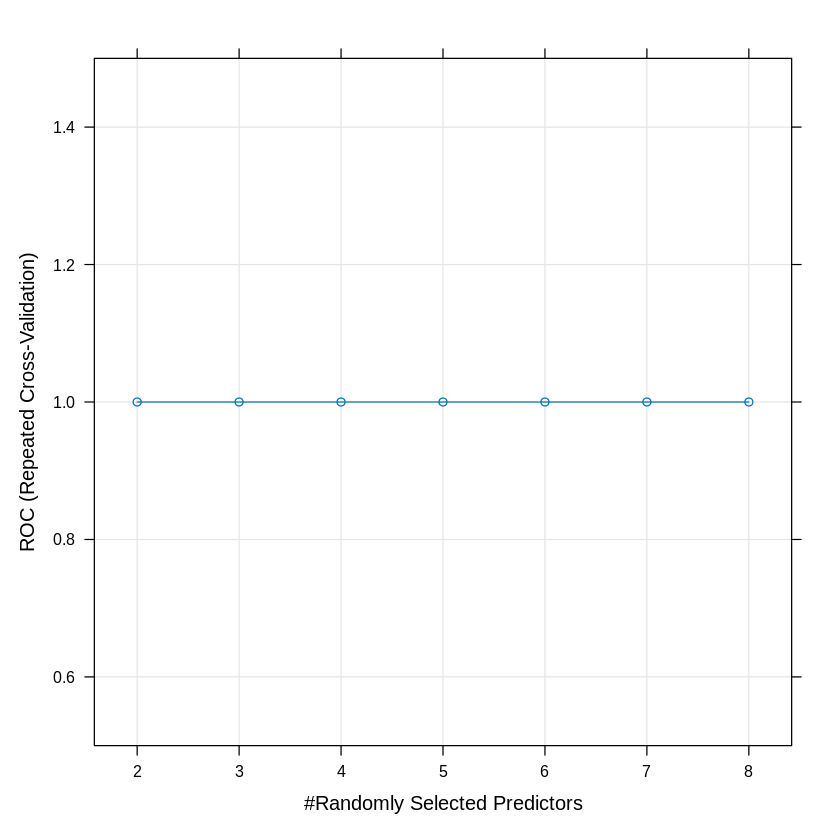

In [35]:
plot(rfFit)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  150   1
      Up      0 161
                                          
               Accuracy : 0.9968          
                 95% CI : (0.9823, 0.9999)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9936          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9938          
         Pos Pred Value : 0.9934          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4808          
         Detection Rate : 0.4808          
   Detection Prevalence : 0.4840          
      Balanced Accuracy : 0.9969          
                                          
       'Positive' Class : Down            
                           

[1] 0.9967949

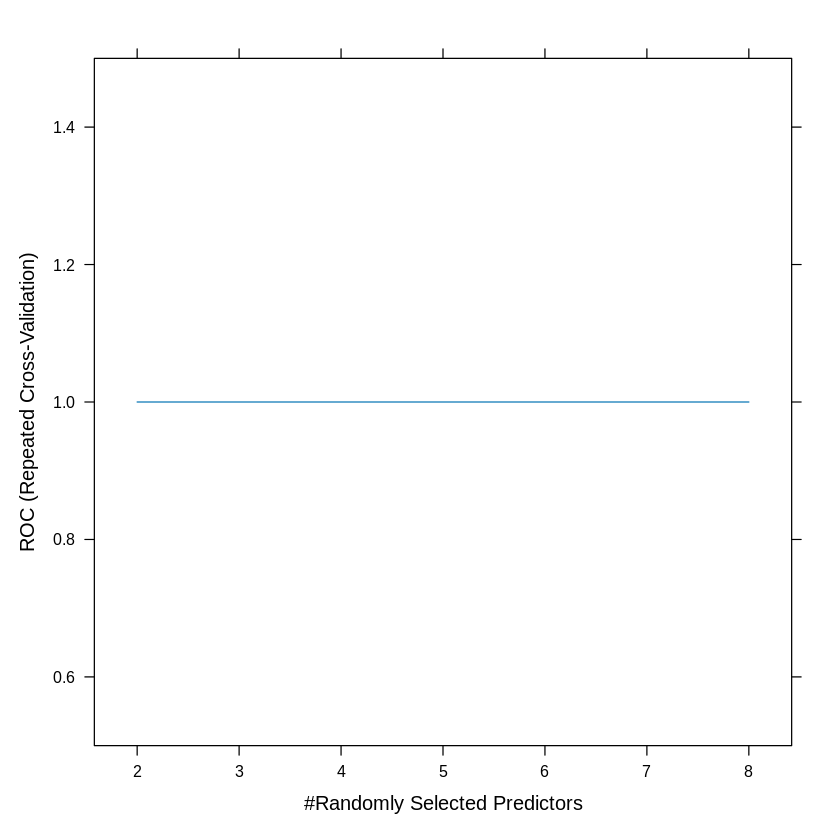

In [36]:
# 몇가지 매개변수로 플롯하기
plot(rfFit, print.thres = 0.5, type = "S")
rfPredict = predict(rfFit, newdata = testing)
confusionMatrix(rfPredict, testing$Direction)
mean(rfPredict == testing$Direction)

In [37]:
library(pROC)
rfPredict = predict(rfFit, newdata=testing , type="prob")
rfROC = roc(response = testing$Direction, predictor=rfPredict[,"Down"],
             levels =levels(rev(testing$Direction)))
rfROC

Setting direction: controls > cases




Call:
roc.default(response = testing$Direction, predictor = rfPredict[,     "Down"], levels = levels(rev(testing$Direction)))

Data: rfPredict[, "Down"] in 150 controls (testing$Direction Down) > 162 cases (testing$Direction Up).
Area under the curve: 1

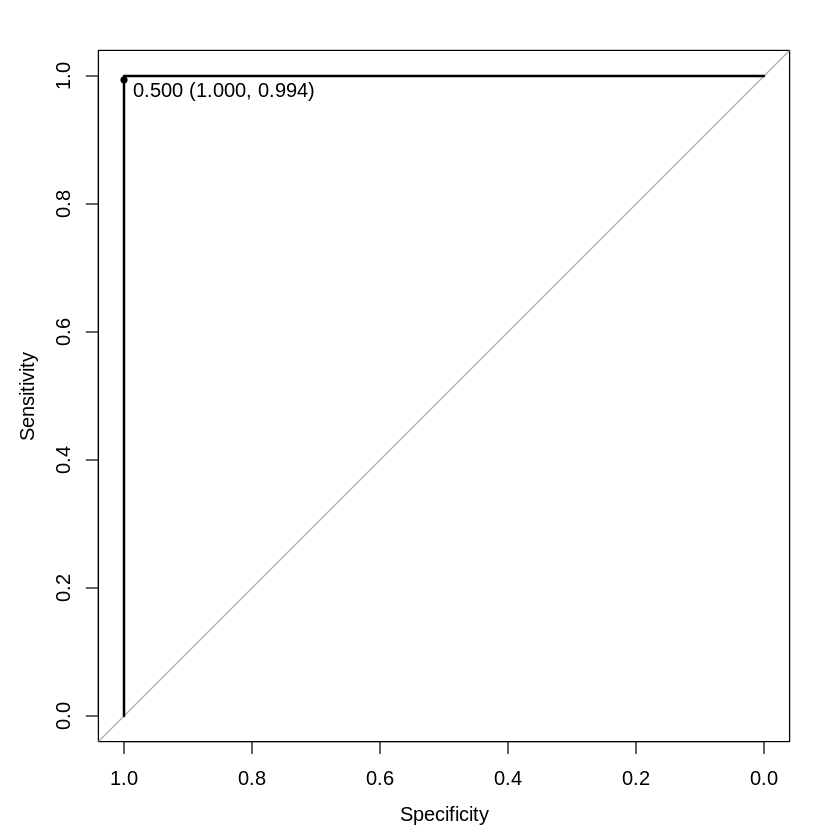

In [38]:
plot(rfROC, type="S", print.thres= 0.5)